#                      Projet Simulation à Événements Discrets

In [1]:
%matplotlib notebook
from random import expovariate, gauss
import matplotlib.pyplot as plt
import json
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

# Partie 1 

Ci-dessous on a crée un algorithme qui simule un serveur qui traite des requêtes des clients , qui arrivent avec des inter-arrivés aléatoires et des  temps d'aciticités générés en utilisant la distribution Exponentielle,et selon les deux mécanismes FIFO et EDF .
On a simulé les perfermances de ces mécanismes avec des courbes montrant le temps de séjour moyen des clients et le nombre de clients moyen dans le systeme en fonction de Lamba qui est le paramétre de la distribution Exponentielle .

<IPython.core.display.Javascript object>


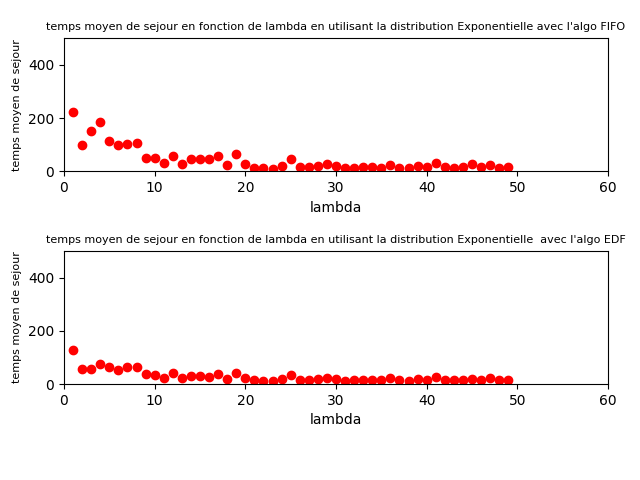

<IPython.core.display.Javascript object>


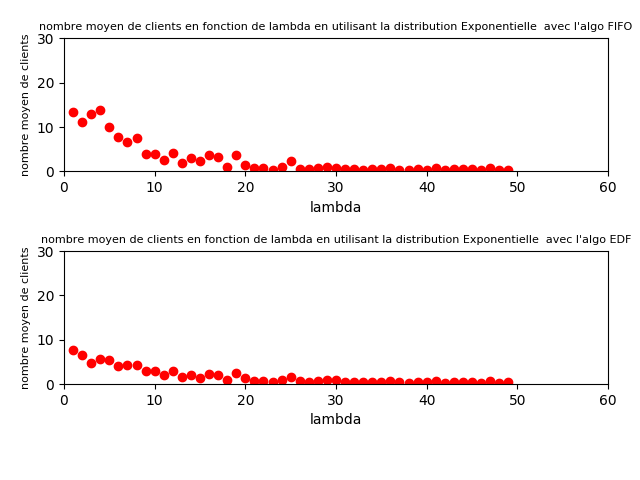

In [2]:
sejour_t_fifo=[]
sejour_t_edf=[]
moy_client_fifo = []
moy_client_edf = []
log_fifo_expo = []
log_edf_expo = []
for i in range(1,50):
    lambda_arrival_interval = i
    lambda_service_time = 12.0
    num_waiting = 0
    arrivals = []
    starts = []
    sejour_fifo = []
    sejour_edf = []
    waits = []
    clients_list = []
    service_time_list = []
    arrival = service_end = 0.0
    for j in range(30):
        arrival += expovariate(1.0 / lambda_arrival_interval)
        service_time = expovariate(1.0 / lambda_service_time)
        clients_list.append([arrival, service_time])
        service_time_list.append(service_time)
        arrivals.append(arrival)
        service_start = max(service_end,arrival)
        service_end = service_start + service_time
        starts.append(service_start)
        sejour_fifo.append(service_end - arrival)
        waits.append(service_start - arrival)
    sejour_t_fifo.append(sum(sejour_fifo)/len(sejour_fifo))
    moy_client_fifo.append(sum(sejour_fifo)/service_end)
    log_fifo_expo.append({})
    log_fifo_expo[-1]['service_time_list']=list(service_time_list)
    log_fifo_expo[-1]['lambda_arrival_interval']=lambda_arrival_interval
    log_fifo_expo[-1]['lambda_service_time']=lambda_service_time
    log_fifo_expo[-1]['arrivals']=list(arrivals)
    log_fifo_expo[-1]['starts']=list(starts)
    log_fifo_expo[-1]['sejour_fifo']=list(sejour_fifo)
    log_fifo_expo[-1]['waits']=list(waits)
    log_fifo_expo[-1]['clients_list']=list(clients_list)
    log_fifo_expo[-1]['sejour_t_fifo']=list(sejour_t_fifo)
    log_fifo_expo[-1]['moy_client_fifo']=list(moy_client_fifo)
    
    
    
    
    min_service_tim = 0.0
    arrival = service_end = 0.0
    service_end = clients_list[0][0] + clients_list[0][1]  # for the first client arrived
    sejour_edf.append(service_end - clients_list[0][0])
    done_client = [0]
    # ipdb.set_trace()
    before_last_end_client_list=[]
    for j in range(1, 30):
        if(clients_list[j][0]>service_end) : service_end=clients_list[j][0]
        #        before_last_end_client_list=[[i,clients_list[i][0]] for i in clients_list]
        before_last_end_client_list = [[i, clients_list[i][1]] for i in range(1, 30) if
                                       clients_list[i][0] <= service_end and i not in done_client]
        min_list = [before_last_end_client_list[i][1] for i in range(len(before_last_end_client_list))]
        min_service_time = min(min_list)
        index = min_list.index(min(min_list))
        service_start = max(service_end, clients_list[before_last_end_client_list[index][0]][0])
        service_end = service_start + min_service_time
        done_client.append(before_last_end_client_list[index][0])
        sejour_edf.append(service_end - clients_list[before_last_end_client_list[index][0]][0])
    # ipdb.set_trace()
    sejour_t_edf.append(sum(sejour_edf)/len(sejour_edf))
#     print sejour_t
    moy_client_edf.append(sum(sejour_edf)/service_end)
    log_edf_expo.append({})
    log_edf_expo[-1]['service_time_list']=list(service_time_list)
    log_edf_expo[-1]['lambda_arrival_interval']=lambda_arrival_interval
    log_edf_expo[-1]['lambda_service_time']=lambda_service_time
    log_edf_expo[-1]['arrivals']=list(arrivals)
    log_edf_expo[-1]['starts']=list(starts)
    log_edf_expo[-1]['sejour_edf']=list(sejour_edf)
    log_edf_expo[-1]['waits']=list(waits)
    log_edf_expo[-1]['clients_list']=list(clients_list)
    log_edf_expo[-1]['sejour_t_edf']=list(sejour_t_edf)
    log_edf_expo[-1]['moy_client_edf']=list(moy_client_edf)

    
    
    
    
plt.figure(1)
plt.subplot(211)
plt.plot(range(1,50), sejour_t_fifo, 'ro')
plt.axis([0, 60, 0, 500])
plt.ylabel('temps moyen de sejour',fontsize=8)
plt.xlabel('lambda')
plt.title("temps moyen de sejour en fonction de lambda en utilisant la distribution Exponentielle avec l'algo FIFO",fontsize=8)
plt.show()

plt.subplot(212)
plt.plot(range(1,50), sejour_t_edf, 'ro')
plt.axis([0, 60, 0, 500])
plt.ylabel('temps moyen de sejour',fontsize=8)
plt.xlabel('lambda')
plt.title("temps moyen de sejour en fonction de lambda en utilisant la distribution Exponentielle  avec l'algo EDF", fontsize=8)
plt.subplots_adjust(top=0.92, bottom=0.2, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()

plt.figure(2)
plt.subplot(211)
plt.plot(range(1,50), moy_client_fifo, 'ro')
plt.axis([0, 60, 0, 30])
plt.ylabel('nombre moyen de clients',fontsize=8)
plt.xlabel('lambda')
plt.title("nombre moyen de clients en fonction de lambda en utilisant la distribution Exponentielle  avec l'algo FIFO", fontsize=8)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()
          
plt.subplot(212)
plt.plot(range(1,50), moy_client_edf, 'ro')
plt.axis([0, 60, 0, 30])
plt.ylabel('nombre moyen de clients',fontsize=8)
plt.xlabel('lambda')
plt.title("nombre moyen de clients en fonction de lambda en utilisant la distribution Exponentielle  avec l'algo EDF", fontsize=8)
plt.subplots_adjust(top=0.92, bottom=0.2, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()
with open('log_fifo_Expo.json', 'wt') as out:
    res = json.dump(log_fifo_expo, out, sort_keys=True, indent=4, separators=(',', ': '))
with open('log_edf_Expo.json', 'wt') as out:
    res = json.dump(log_edf_expo, out, sort_keys=True, indent=4, separators=(',', ': '))

## Interpretation

En analysant les quatre courbes on distingue que le mécanisme EDF est plus perfemant que le mécanisme FIFO avec la distribution Exponentielle , EDF rassure que la file d'attente du systéme ne dépasse pas 10 clients dans cette situation et que le temps de séjour moyen ne dépasse pas 150 secondes .

################################################################################################################
################################################################################################################
################################################################################################################

# FIFO et EDF avec la distribution Gaussienne

Aussi ci-dessous on a crée un algorithme qui simule un serveur qui traite des requêtes des clients , qui arrivent avec des inter-arrivés aléatoires et des temps d'aciticités générés en utilisant la distribution Gaussienne,et selon les deux mécanismes FIFO et EDF .
On a simulé les perfermances de ces mécanismes avec des courbes montrant le temps de séjour moyen des clients et le nombre de clients moyen dans le systeme en fonction de "mu" qui est le paramétre de la distribution Gaussienne .

<IPython.core.display.Javascript object>


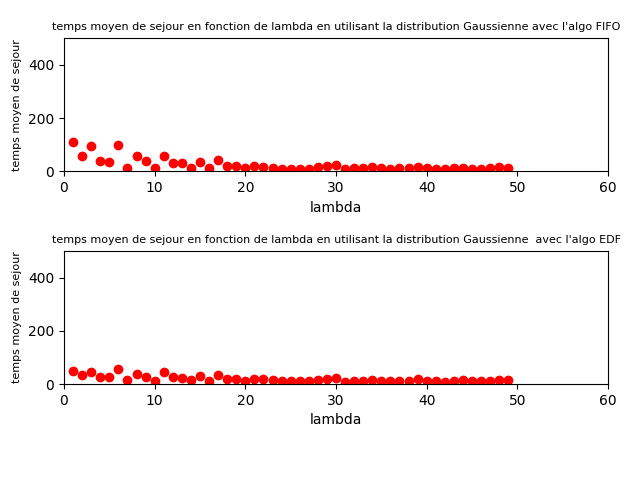

<IPython.core.display.Javascript object>


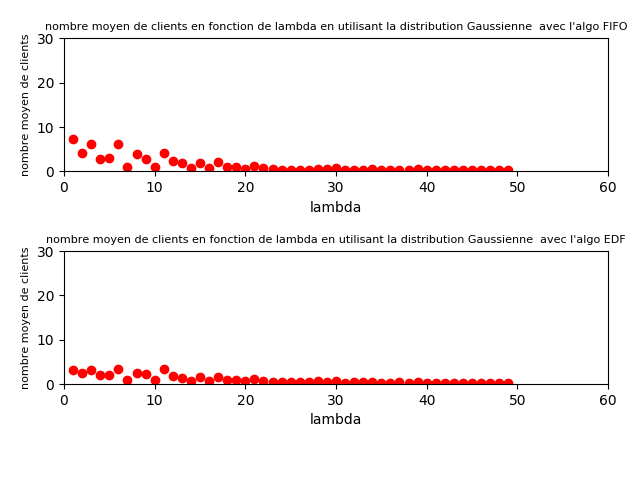

In [3]:
sejour_t_fifo=[]
sejour_t_edf=[]
moy_client_fifo = []
moy_client_edf = []
log_edf_gauss = []
log_fifo_gauss = []
for i in range(1,50):
    mu_arrival_interval = i
    sigma=12.0
    lambda_service_time = 12.0
    num_waiting = 0
    arrivals = []
    starts = []
    sejour_fifo = []
    sejour_edf = []
    waits = []
    clients_list = []
    service_time_list = []
    arrival = service_end = 0.0
    for i in range(30):
        arrival += abs(gauss(mu_arrival_interval,sigma))
        service_time = expovariate(1.0 / lambda_service_time)
        clients_list.append([arrival, service_time])
        service_time_list.append(service_time)
        arrivals.append(arrival)
        service_start = max(service_end,arrival)
        service_end = service_start + service_time
        starts.append(service_start)
        sejour_fifo.append(service_end - arrival)
        waits.append(service_start - arrival)
    sejour_t_fifo.append(sum(sejour_fifo)/len(sejour_fifo))
    moy_client_fifo.append(sum(sejour_fifo)/service_end)
    log_fifo_gauss.append({})
    log_fifo_gauss[-1]['service_time_list']=list(service_time_list)
    log_fifo_gauss[-1]['lambda_arrival_interval']=lambda_arrival_interval
    log_fifo_gauss[-1]['lambda_service_time']=lambda_service_time
    log_fifo_gauss[-1]['arrivals']=list(arrivals)
    log_fifo_gauss[-1]['starts']=list(starts)
    log_fifo_gauss[-1]['sejour_fifo']=list(sejour_fifo)
    log_fifo_gauss[-1]['waits']=list(waits)
    log_fifo_gauss[-1]['clients_list']=list(clients_list)
    log_fifo_gauss[-1]['sejour_t_fifo']=list(sejour_t_fifo)
    log_fifo_gauss[-1]['moy_client_fifo']=list(moy_client_fifo)
    
    
    
    
    
    min_service_tim = 0.0
    arrival = service_end = 0.0
    service_end = clients_list[0][0] + clients_list[0][1]  # for the first client arrived
    sejour_edf.append(service_end - clients_list[0][0])
    done_client = [0]
    # ipdb.set_trace()
    before_last_end_client_list=[]
    for j in range(1, 30):
        if(clients_list[j][0]>service_end) : service_end=clients_list[j][0]
        #        before_last_end_client_list=[[i,clients_list[i][0]] for i in clients_list]
        before_last_end_client_list = [[i, clients_list[i][1]] for i in range(1, 30) if
                                       clients_list[i][0] <= service_end and i not in done_client]
        min_list = [before_last_end_client_list[i][1] for i in range(len(before_last_end_client_list))]
        min_service_time = min(min_list)
        index = min_list.index(min(min_list))
        service_start = max(service_end, clients_list[before_last_end_client_list[index][0]][0])
        service_end = service_start + min_service_time
        done_client.append(before_last_end_client_list[index][0])
        sejour_edf.append(service_end - clients_list[before_last_end_client_list[index][0]][0])
    # ipdb.set_trace()
    sejour_t_edf.append(sum(sejour_edf)/len(sejour_edf))
#     print sejour_t
    moy_client_edf.append(sum(sejour_edf)/service_end)
    log_edf_gauss.append({})
    log_edf_gauss[-1]['service_time_list']=list(service_time_list)
    log_edf_gauss[-1]['lambda_arrival_interval']=lambda_arrival_interval
    log_edf_gauss[-1]['lambda_service_time']=lambda_service_time
    log_edf_gauss[-1]['arrivals']=list(arrivals)
    log_edf_gauss[-1]['starts']=list(starts)
    log_edf_gauss[-1]['sejour_edf']=list(sejour_edf)
    log_edf_gauss[-1]['waits']=list(waits)
    log_edf_gauss[-1]['clients_list']=list(clients_list)
    log_edf_gauss[-1]['sejour_t_edf']=list(sejour_t_edf)
    log_edf_gauss[-1]['moy_client_edf']=list(moy_client_edf)

    
    
    
    
plt.figure(3)
plt.subplot(211)
plt.plot(range(1,50), sejour_t_fifo, 'ro')
plt.axis([0, 60, 0, 500])
plt.ylabel('temps moyen de sejour',fontsize=8)
plt.xlabel('lambda')
plt.title("temps moyen de sejour en fonction de lambda en utilisant la distribution Gaussienne avec l'algo FIFO",fontsize=8)
plt.show()

plt.subplot(212)
plt.plot(range(1,50), sejour_t_edf, 'ro')
plt.axis([0, 60, 0, 500])
plt.ylabel('temps moyen de sejour',fontsize=8)
plt.xlabel('lambda')
plt.title("temps moyen de sejour en fonction de lambda en utilisant la distribution Gaussienne  avec l'algo EDF", fontsize=8)
plt.subplots_adjust(top=0.92, bottom=0.2, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()

plt.figure(4)
plt.subplot(211)
plt.plot(range(1,50), moy_client_fifo, 'ro')
plt.axis([0, 60, 0, 30])
plt.ylabel('nombre moyen de clients',fontsize=8)
plt.xlabel('lambda')
plt.title("nombre moyen de clients en fonction de lambda en utilisant la distribution Gaussienne  avec l'algo FIFO", fontsize=8)
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()
          
plt.subplot(212)
plt.plot(range(1,50), moy_client_edf, 'ro')
plt.axis([0, 60, 0, 30])
plt.ylabel('nombre moyen de clients',fontsize=8)
plt.xlabel('lambda')
plt.title("nombre moyen de clients en fonction de lambda en utilisant la distribution Gaussienne  avec l'algo EDF", fontsize=8)
plt.subplots_adjust(top=0.92, bottom=0.2, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.show()
with open('log_fifo_Gauss.json', 'wt') as out:
    res = json.dump(log_fifo_expo, out, sort_keys=True, indent=4, separators=(',', ': '))
with open('log_edf_Gauss.json', 'wt') as out:
    res = json.dump(log_edf_expo, out, sort_keys=True, indent=4, separators=(',', ': '))

## Interpretation

En analysant les quatre courbes on distingue que le mécanisme EDF est plus perfemant que le mécanisme FIFO avec la distribution Gausisienne , EDF rassure que la file d'attente du systéme ne dépasse pas 5 clients dans cette situation et que le temps de séjour moyen ne dépasse pas 60 secondes .

################################################################################################################
################################################################################################################
################################################################################################################

# Partie 2

# Round Robin avec la distribution Exponentielle

Ci-dessous on a crée un algorithme qui simule un serveur qui traite des requêtes des clients , qui arrivent avec des inter-arrivés aléatoires et des temps d'aciticités générés en utilisant la distribution Exponentielle,et selon le mécanisme Round Robin "RR" en variant son paramétre "q" .
On a simulé les perfermances de ce mécanisme avec des courbes montrant le temps de séjour moyen des clients et le nombre de clients moyen dans le systeme en fonction de Lambda qui est le paramétre de la distribution Exponentielle .Aussi on a généré un fichier Log qui comporte les evénements qui ont été arrivés au systéme dans le fichier "log_rr_expo.json ".

<IPython.core.display.Javascript object>


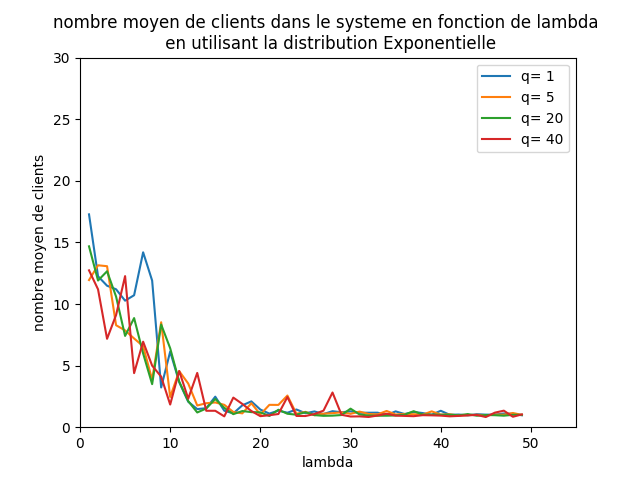

<IPython.core.display.Javascript object>


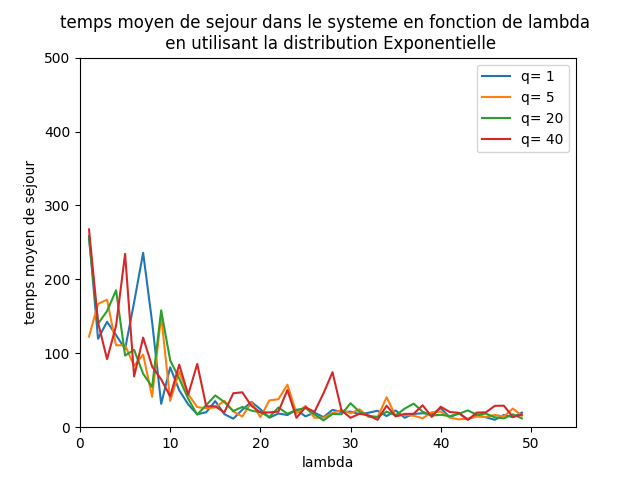

In [4]:
log=[]
for q in (1,5,20,40):
    moy_sejour=[]
    moy_client = []
    log.append([])
    for k in range(1,50):
        lambda_arrival_interval = k
        lambda_service_time = 12.0
        arrivals = []
        service_times = []
        arrival = 0.0
        t = 0
        client = 0
        sejour = 0
        in_service = []
        last = 0
        for i in range(30):
            arrival += expovariate(1.0 / lambda_arrival_interval)
            arrivals.append(arrival)
            service_time = expovariate(1.0 / lambda_service_time)
            service_times.append(service_time)
        log[-1].append({})
        log[-1][-1]['q']=q
        log[-1][-1]['arrivals']=arrivals
        log[-1][-1]['service_times']=list(service_times)
        log[-1][-1]['lambda_arrival_interval']=lambda_arrival_interval
        log[-1][-1]['lambda_service_time']=lambda_service_time
        log[-1][-1]['in_service']=[]
        log[-1][-1]['time']=[]
        log[-1][-1]['in_service'].append(list(in_service))
        log[-1][-1]['time'].append(t)
        t = arrivals[0]
        in_service.append(0)
        q_service = min(q,service_times[0])
        client += q_service * len(in_service)
        service_times[0]-=q_service
        t+=q_service
        if service_times[0]==0:
            sejour += t-arrivals[0]
        while last!=29 and arrivals[last+1] <= t:
            last+=1
            if service_times[last]!=0:
                client += (arrivals[last]-t)
                in_service.append(last)
        if len(in_service)!=0:
            if service_times[in_service[0]]!=0:
                in_service.append(in_service.pop(0))
            else:
                in_service.pop(0)
                while last<4 and service_times[last]==0:
                    last+=1
                in_service.append(last)
                client += (arrivals[last]-t) * len(in_service)
                t=arrivals[last]
        else:
            while last<29 and service_times[last]==0:
                last+=1
            in_service.append(last)
            client += (arrivals[last]-t) * len(in_service)
            t=arrivals[last]
        log[-1][-1]['in_service'].append(list(in_service))
        log[-1][-1]['time'].append(t)
        while sum(service_times)!=0:
            while last!=29 and arrivals[last+1] <= t:
                last+=1
                client += (arrivals[last]-t)
                in_service.append(last)
            if len(in_service)!=0:
                if service_times[in_service[0]]!=0:
                    in_service.append(in_service.pop(0))
                else:
                    in_service.pop(0)
            else:
                last+=1
                in_service.append(last)
                client += (arrivals[last]-t) * len(in_service)
                t=arrivals[last]
            if last<30 and len(in_service)!=0:
                q_service = min(q,service_times[in_service[0]])
                client += q_service * len(in_service)
                service_times[in_service[0]]-=q_service
                t+=q_service
                if service_times[in_service[0]]==0:
                    sejour += t-arrivals[in_service[0]]
            log[-1][-1]['in_service'].append(list(in_service))
            log[-1][-1]['time'].append(t)
        moy_client.append(client/t)
        moy_sejour.append(sejour/len(arrivals))
    plt.figure(5)
    plt.subplot(111)
    plt.plot(range(1,50), moy_client, label="q= "+str(q))
    plt.axis([0, 55, 0, 30])
    plt.ylabel('nombre moyen de clients')
    plt.xlabel('lambda')
    plt.title("nombre moyen de clients dans le systeme en fonction de lambda \n en utilisant la distribution Exponentielle")
    plt.legend()
    plt.show()


    plt.figure(6)    
    plt.subplot(111)
    plt.plot(range(1,50), moy_sejour, label="q= "+str(q))
    plt.axis([0, 55, 0, 500])
    plt.ylabel('temps moyen de sejour')
    plt.xlabel('lambda')
    plt.title("temps moyen de sejour dans le systeme en fonction de lambda \n en utilisant la distribution Exponentielle")
    plt.legend()
    plt.show()

with open('log_rr_expo.json', 'wt') as out:
    res = json.dump(log, out, sort_keys=True, indent=4, separators=(',', ': '))

## Interpretation

# Round Robin avec la distribution Gaussienne

Ci-dessous on a crée un algorithme qui simule un serveur qui traite des requêtes des clients , qui arrivent avec des inter-arrivés aléatoires et des temps d'aciticités générés en utilisant la distribution Gaussienne,et selon le mécanisme Round Robin "RR" en variant son paramétre "q" .
On a simulé les perfermances de ce mécanisme avec des courbes montrant le temps de séjour moyen des clients et le nombre de clients moyen dans le systeme en fonction de "mu" qui est le paramétre de la distribution Gaussienne . Aussi on a généré un fichier Log qui comporte les evénements qui ont été arrivés au systéme dans le fichier "log_rr_gauss.json ".

<IPython.core.display.Javascript object>


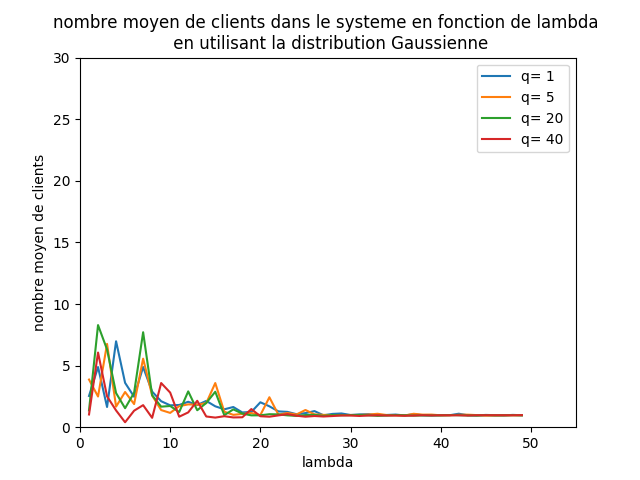

<IPython.core.display.Javascript object>


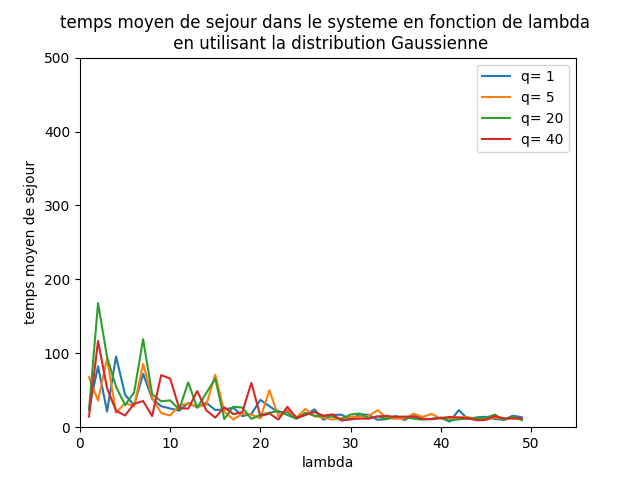

In [5]:
log=[]
for q in (1,5,20,40):
    moy_sejour=[]
    moy_client = []
    log.append([])
    for k in range(1,50):
        mu_arrival_interval = k
        sigma=12.0
        lambda_service_time = 12.0
        arrivals = []
        service_times = []
        arrival = 0.0
        t = 0
        client = 0
        sejour = 0
        in_service = []
        last = 0
        for i in range(30):
            arrival += abs(gauss(mu_arrival_interval,sigma))
            arrivals.append(arrival)
            service_time = expovariate(1.0 / lambda_service_time)
            service_times.append(service_time)
        log[-1].append({})
        log[-1][-1]['q']=q
        log[-1][-1]['arrivals']=arrivals
        log[-1][-1]['service_times']=list(service_times)
        log[-1][-1]['lambda_arrival_interval']=lambda_arrival_interval
        log[-1][-1]['lambda_service_time']=lambda_service_time
        log[-1][-1]['in_service']=[]
        log[-1][-1]['time']=[]
        log[-1][-1]['in_service'].append(list(in_service))
        log[-1][-1]['time'].append(t)
        t = arrivals[0]
        in_service.append(0)
        q_service = min(q,service_times[0])
        client += q_service * len(in_service)
        service_times[0]-=q_service
        t+=q_service
        if service_times[0]==0:
            sejour += t-arrivals[0]
        while last!=29 and arrivals[last+1] <= t:
            last+=1
            if service_times[last]!=0:
                client += (arrivals[last]-t)
                in_service.append(last)
        if len(in_service)!=0:
            if service_times[in_service[0]]!=0:
                in_service.append(in_service.pop(0))
            else:
                in_service.pop(0)
                while last<4 and service_times[last]==0:
                    last+=1
                in_service.append(last)
                client += (arrivals[last]-t) * len(in_service)
                t=arrivals[last]
        else:
            while last<29 and service_times[last]==0:
                last+=1
            in_service.append(last)
            client += (arrivals[last]-t) * len(in_service)
            t=arrivals[last]
        log[-1][-1]['in_service'].append(list(in_service))
        log[-1][-1]['time'].append(t)
        while sum(service_times)!=0:
            while last!=29 and arrivals[last+1] <= t:
                last+=1
                client += (arrivals[last]-t)
                in_service.append(last)
            if len(in_service)!=0:
                if service_times[in_service[0]]!=0:
                    in_service.append(in_service.pop(0))
                else:
                    in_service.pop(0)
            else:
                last+=1
                in_service.append(last)
                client += (arrivals[last]-t) * len(in_service)
                t=arrivals[last]
            if last<30 and len(in_service)!=0:
                q_service = min(q,service_times[in_service[0]])
                client += q_service * len(in_service)
                service_times[in_service[0]]-=q_service
                t+=q_service
                if service_times[in_service[0]]==0:
                    sejour += t-arrivals[in_service[0]]
            log[-1][-1]['in_service'].append(list(in_service))
            log[-1][-1]['time'].append(t)
        moy_client.append(client/t)
        moy_sejour.append(sejour/len(arrivals))
    plt.figure(7)
    plt.subplot(111)
    plt.plot(range(1,50), moy_client, label="q= "+str(q))
    plt.axis([0, 55, 0, 30])
    plt.ylabel('nombre moyen de clients')
    plt.xlabel('lambda')
    plt.title("nombre moyen de clients dans le systeme en fonction de lambda \n en utilisant la distribution Gaussienne")
    plt.legend()
    plt.show()


    plt.figure(8)    
    plt.subplot(111)
    plt.plot(range(1,50), moy_sejour, label="q= "+str(q))
    plt.axis([0, 55, 0, 500])
    plt.ylabel('temps moyen de sejour')
    plt.xlabel('lambda')
    plt.title("temps moyen de sejour dans le systeme en fonction de lambda \n en utilisant la distribution Gaussienne")
    plt.legend()
    plt.show()

with open('log_rr_gauss.json', 'wt') as out:
    res = json.dump(log, out, sort_keys=True, indent=4, separators=(',', ': '))

## Interpretation

En analysant les deux derniers courbes et les courbes du mécanisme FIFO avec la distribution Exponentielle , on constate que le mécanisme Round Robin est moins performant que FIFO.

En analysant les deux derniers courbes et les courbes du mécanisme FIFO avec la distribution Gausienne , on constate que le mécanisme Round Robin est plus performant que FIFO meme en variant "q".